# Algorithmic Bias - Core Code
Some code to get started on the Algorithmic Bias assignment. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
bcDB = datasets.load_breast_cancer()

In [2]:
bcDF = pd.DataFrame(bcDB.data, columns= list(bcDB['feature_names']))
bcDF['target'] = pd.Series(bcDB.target)
bcDF = bcDF.sort_values(by = ['target'])
bcDF = bcDF.reset_index(drop=True)
bcDF.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,0.07542,...,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460,0
2,12.34,26.86,81.15,477.4,0.1034,0.1353,0.1085,0.04562,0.1943,0.06937,...,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.12050,0
3,14.86,23.21,100.40,671.4,0.1044,0.1980,0.1697,0.08878,0.1737,0.06672,...,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701,0
4,13.77,22.29,90.63,588.9,0.1200,0.1267,0.1385,0.06526,0.1834,0.06877,...,34.01,111.6,806.9,0.1737,0.3122,0.3809,0.1673,0.3080,0.09333,0


In [3]:
vc = bcDF['target'].value_counts()
for i,j in enumerate(bcDB.target_names):
    print (vc[i],j)

212 malignant
357 benign


In [4]:
y = bcDF.pop('target').values
X = bcDF.values
X.shape, y.shape

((569, 30), (569,))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


## $k$-NN
Malignant is the minority class at ~40%.  
$k$-NN classifier picks up this under-representation and accentuates it,  
predicting just 36% malignant. 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

kNN = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=2)
Breast_KNN = kNN.fit(X_train, y_train)
y_knn =Breast_KNN.predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_knn.sum()/len(y_knn))))
acc = accuracy_score(y_test, y_knn)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_knn)
print("Confusion matrix:\n{}".format(confusion)) 


(379, 30) (190, 30)
Malignant in test set : 0.39
Predicted malignant : 0.37
Accuracy: 0.91
Confusion matrix:
[[ 63  11]
 [  7 109]]


## KNN
## Plot non-normalized & Normalised confusion matrix

Confusion matrix, without normalization
[[ 63  11]
 [  7 109]]
Normalized confusion matrix
[[0.85 0.15]
 [0.06 0.94]]


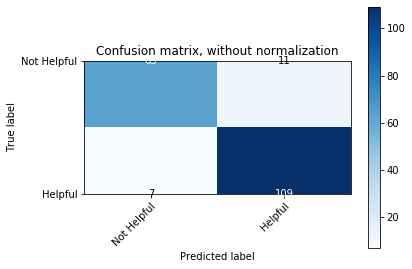

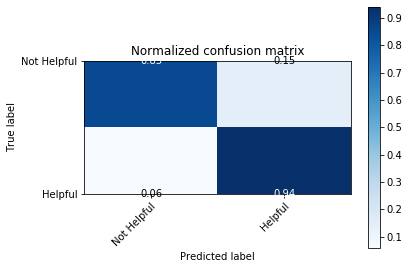

Report:
               precision    recall  f1-score   support

Non Malignant       0.90      0.85      0.88        74
    Malignant       0.91      0.94      0.92       116

     accuracy                           0.91       190
    macro avg       0.90      0.90      0.90       190
 weighted avg       0.91      0.91      0.90       190



In [7]:
#KNN
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_knn, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_knn, classes=['Not Helpful','Helpful'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
report = classification_report(y_test, y_knn, target_names = ['Non Malignant','Malignant'])
print("Report:\n{}".format(report)) 

## Naives Bayes
### Naives Bayes classifier successfully predict 38% of malignant

In [8]:
mnb = GaussianNB()
Breast_NB = mnb.fit(X_train, y_train)
y_NB = Breast_NB.predict(X_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_NB.sum()/len(y_NB))))
acc = accuracy_score(y_test, y_NB)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_NB)
print("Confusion matrix:\n{}".format(confusion)) 

Malignant in test set : 0.39
Predicted malignant : 0.38
Accuracy: 0.90
Confusion matrix:
[[ 64  10]
 [  9 107]]


Confusion matrix, without normalization
[[ 64  10]
 [  9 107]]
Normalized confusion matrix
[[0.86 0.14]
 [0.08 0.92]]


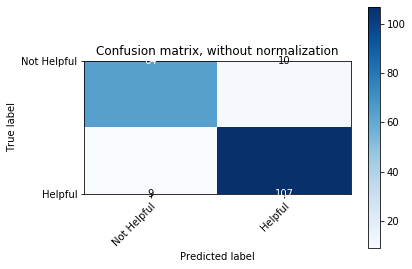

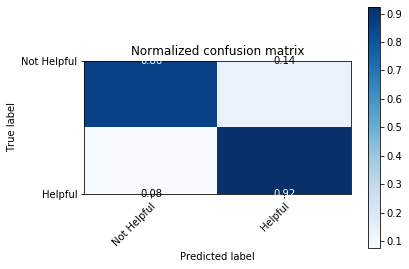

Report:
               precision    recall  f1-score   support

Non Malignant       0.88      0.86      0.87        74
    Malignant       0.91      0.92      0.92       116

     accuracy                           0.90       190
    macro avg       0.90      0.89      0.89       190
 weighted avg       0.90      0.90      0.90       190



In [9]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_NB, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_NB, classes=['Not Helpful','Helpful'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


report = classification_report(y_test, y_NB, target_names = ['Non Malignant','Malignant'])
print("Report:\n{}".format(report)) 

## Decision Tree
### Decision Tree classifier is successfully able to identify the malignant 39% Prediction.

In [10]:
from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(criterion='entropy')
Breast_DT=dtree.fit(X_train, y_train)
y_DT = Breast_DT.predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_DT.sum()/len(y_DT))))
acc = accuracy_score(y_test, y_DT)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_DT)
print("Confusion matrix:\n{}".format(confusion)) 

Malignant in test set : 0.39
Predicted malignant : 0.37
Accuracy: 0.92
Confusion matrix:
[[ 64  10]
 [  6 110]]


Confusion matrix, without normalization
[[ 64  10]
 [  6 110]]
Normalized confusion matrix
[[0.86 0.14]
 [0.05 0.95]]


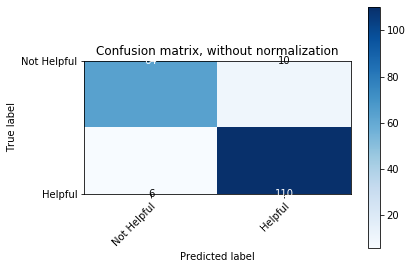

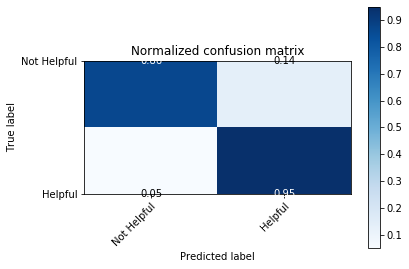

Report:
               precision    recall  f1-score   support

Non Malignant       0.91      0.86      0.89        74
    Malignant       0.92      0.95      0.93       116

     accuracy                           0.92       190
    macro avg       0.92      0.91      0.91       190
 weighted avg       0.92      0.92      0.92       190



In [11]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_DT, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_DT, classes=['Not Helpful','Helpful'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


report = classification_report(y_test, y_DT, target_names = ['Non Malignant','Malignant'])
print("Report:\n{}".format(report)) 

## Logistic Regression
### The Logistic Regression is able to predict 36% Malignant

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_LR = log_reg.predict(X_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_LR.sum()/len(y_LR))))

acc = accuracy_score(y_test, y_LR)
print("Accuracy hold-out: {0:.2f}".format(acc))
confusion = confusion_matrix(y_test, y_LR)
print("Confusion matrix:\n{}".format(confusion))

Malignant in test set : 0.39
Predicted malignant : 0.36
Accuracy hold-out: 0.94
Confusion matrix:
[[ 66   8]
 [  3 113]]


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[ 66   8]
 [  3 113]]
Normalized confusion matrix
[[0.89 0.11]
 [0.03 0.97]]


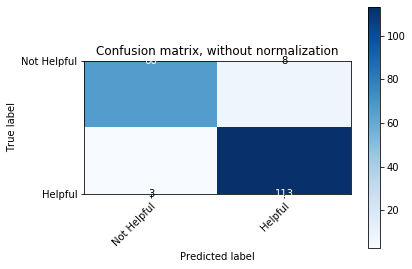

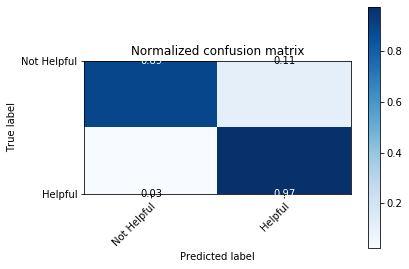

Report:
               precision    recall  f1-score   support

Non Malignant       0.96      0.89      0.92        74
    Malignant       0.93      0.97      0.95       116

     accuracy                           0.94       190
    macro avg       0.95      0.93      0.94       190
 weighted avg       0.94      0.94      0.94       190



In [13]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_LR, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_LR, classes=['Not Helpful','Helpful'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

report = classification_report(y_test, y_LR, target_names = ['Non Malignant','Malignant'])
print("Report:\n{}".format(report)) 

## Question 1b: Bias Check using Cross Validation on 4 Fold validation

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [mnb,kNN,dtree,log_reg]
folds = 4
v = 0 #  use 1 or 0


In [15]:
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate)) 



4 x CV GaussianNB             FP: 0.11  TP: 0.97
4 x CV KNeighborsClassifier   FP: 0.13  TP: 0.96
4 x CV DecisionTreeClassifier FP: 0.11  TP: 0.95
4 x CV LogisticRegression     FP: 0.08  TP: 0.97


#### Cross Validation testing results are as follows:
##### KNN : 0.96,  Decision Tree : 0.95,  Logistic Regression : 0.97,  GaussianNB : 0.97
#### From the Result we can infer that the False Positive denotes the bias of the model towards Benign,Which is supposed to be minimum although the classifier GaussianNB and Logistic Regression have the highest True Positives at 97%. However, since Logistic Regression predicts the least False Positives, Hence Logistic Regression is the Best Model 

## Question 2 : Propose a strategy to rectify this bias. Evaluate the effect of this strategy in terms of classification bias and overall accuracy. You may choose to work with hold-out testing only for this evaluation. Discuss the effectiveness of the strategy. 


### After researching effective stratergy to rectify the bias is using Undersample the Majority class & Oversample the Minority Class

In [16]:
import pandas as pd
from sklearn.utils import resample
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

bcDB = datasets.load_breast_cancer()
bcDF = pd.DataFrame(bcDB.data, columns= list(bcDB['feature_names']))
bcDF['target'] = pd.Series(bcDB.target)
bcDF = bcDF.sort_values(by = ['target'])
bcDF = bcDF.reset_index(drop=True)
y = bcDF['target']
X = bcDF.drop('target', axis=1)
# our classifier to use is KNN
classifier = KNeighborsClassifier(n_neighbors= 3)
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
Malignant = X[X.target==1]
belign = X[X.target==0]

## Over sampling minority

In [17]:
Bel_Oversample = resample(belign,
                          replace=True, # sample with replacement
                          n_samples=len(Malignant), # match number in majority class
                          random_state=42) # Sample Space
# combine majority and upsampled minority
Over_sampled = pd.concat([Malignant , Bel_Oversample])

y_train = Over_sampled.target
X_train = Over_sampled.drop('target', axis=1)

y_pred_knn = classifier.fit(X_train, y_train).predict(X_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred_knn.sum()/len(y_pred_knn))))

acc = accuracy_score(y_test, y_pred_knn)
print("Upsampling Accuracy hold-out: {:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_pred_knn)
print("Upsampling Confusion matrix:\n{}".format(confusion))



Malignant in test set : 0.40
Predicted malignant : 0.39
Upsampling Accuracy hold-out: 0.91
Upsampling Confusion matrix:
[[40  6]
 [ 4 64]]


## Under Sampling the Majority Class

In [18]:
mel_undersampled = resample(Malignant,
                          replace=True, # sample with replacement
                          n_samples=len(belign), # match number in majority class
                          random_state=42) # Sample Space

under_sampled = pd.concat([belign, mel_undersampled])

y_train = under_sampled.target
X_train = under_sampled.drop('target', axis=1)

y_pred_knn = classifier.fit(X_train, y_train).predict(X_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred_knn.sum()/len(y_pred_knn))))

acc = accuracy_score(y_test, y_pred_knn)
print("Downsampling Accuracy hold-out: {:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_pred_knn)
print("Downsampling Confusion matrix:\n{}".format(confusion))

Malignant in test set : 0.40
Predicted malignant : 0.39
Downsampling Accuracy hold-out: 0.91
Downsampling Confusion matrix:
[[40  6]
 [ 4 64]]


#### In this scenario, after upsampling and downsampling we are getting similar results.The accuracy remaining  91%. The bias is more towards the majortiy class when compared to that of the imbalanced dataset. There not much change observed in this dataset and the accuracy is not changing much.Also there is no change in the FP. 

## Question 3: Test the impact of this strategy on another dataset of your choice. Discuss the effectiveness of the strategy on this second dataset.  


### The dataset considered here is diabetic dataset with two classes in target 0 and 1.

### In this imbalanced dataset, Target 0 has 500 observations and Target 1 has 268 observations.

In [19]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import datasets
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))

# our classifier to use
classifier = KNeighborsClassifier(n_neighbors= 3)
DbDF = pd.read_csv('diabetes.csv')
dbDF = DbDF.reset_index(drop=True)
dbDF.head()

y = dbDF['target']
X = dbDF.drop('target', axis=1)



Diabetic Dataset
Non_Diabetic in test set : 0.68
Predicted Daibetic  : 0.73
Accuracy hold-out: 0.72
Confusion matrix, without normalization
[[144  29]
 [ 43  40]]
(327, 9)
(185, 9)


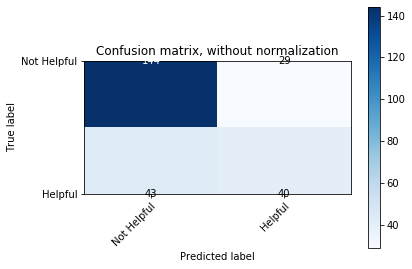

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=2)

print("Diabetic Dataset")
# build normal model
y_pred_knn = classifier.fit(X_train, y_train).predict(X_test)

print("Non_Diabetic in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted Daibetic  : %0.2f" % (1- (y_pred_knn.sum()/len(y_pred_knn))))

acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy hold-out: {0:.2f}".format(acc)) 

plot_confusion_matrix(y_test, y_pred_knn, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')


# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# Target Label 1 and Label 2
Label1 = X[X['target'] == 0]
Label2 = X[X['target'] == 1]
print(Label1.shape)
print(Label2.shape)

Oversampling the dataset
Diabetic in test set : 0.68
Predicted Diabetic: 0.57
Over_sampling Accuracy hold-out: 0.72
Confusion matrix, without normalization
[[124  49]
 [ 23  60]]


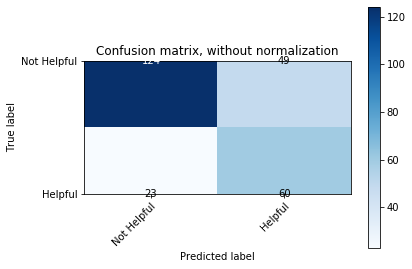

In [21]:
from sklearn.utils import resample
print('Oversampling the dataset')
# upsample minority
Label1_Oversample = resample(Label1,
                          replace=True, # sample with replacement
                          n_samples=len(Label2), # match number in majority class
                          random_state=42) # reproducible results
# combine majority and upsampled minority
Over_sampled = pd.concat([Label2, Label1_Oversample])

y_train = Over_sampled['target']
X_train = Over_sampled.drop('target', axis=1)

#Building the Model  & fit it with Classifier as KNN
y_pred_knn = classifier.fit(X_train, y_train).predict(X_test)
#Hold Out Testing on the Data 
print("Diabetic in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted Diabetic: %0.2f" % (1- (y_pred_knn.sum()/len(y_pred_knn))))

acc = accuracy_score(y_test, y_pred_knn)
print("Over_sampling Accuracy hold-out: {:.2f}".format(acc)) 

plot_confusion_matrix(y_test, y_pred_knn, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

In [22]:
print('Undersampling the dataset to balance with Majority Label')

Label2_sampled = resample(Label2,
                          replace=True, # sample with replacement
                          n_samples=len(Label1), # match number in majority class
                          random_state=42) # reproducible results
# combine majority and upsampled minority
downsampled = pd.concat([Label1, Label2_sampled])

y_train = downsampled['target']
X_train = downsampled.drop('target', axis=1)

y_pred_knn = kNN.fit(X_train, y_train).predict(X_test)

print("Diabetic in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted Daibetic : %0.2f" % (1- (y_pred_knn.sum()/len(y_pred_knn))))

acc = accuracy_score(y_test, y_pred_knn)
print("Under_sampling Accuracy hold-out: {:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_pred_knn)
print("Under_sampling Confusion matrix:\n{}".format(confusion))


Undersampling the dataset to balance with Majority Label
Diabetic in test set : 0.68
Predicted Daibetic : 0.66
Under_sampling Accuracy hold-out: 0.69
Under_sampling Confusion matrix:
[[131  42]
 [ 37  46]]


#### The accuracy on Diabetic dataset is 73%.After  Applying Oversampling and Undersampling on the dataset we observe that the Accucary be 72% 
#### The accuracy of the model after upsampling is 69%. 
